In [1]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import warnings
warnings.filterwarnings("ignore")



###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 



In [2]:

data = {
  "valuationDate": "2021-03-17",
  "settlementDate": "2021-03-18",
  "maturityDate": "2021-06-18",
  "startDate": "2021-03-18",
  "spotPrice": 7.5109,
  "shortLeg": {
    "notional": 7880000,
    "currency": "TRY",
    "dayCounter": "Actual360",
    "calendar": "Turkey",
    "businessDayConvention": "ModifiedFollowing",
    "endOfMonth": True,
    "initialNominal": 7510900
  },
  "longLeg": {
    "notional": 1000000,
    "currency": "USD",
    "dayCounter": "Actual360",
    "calendar": "UnitedStates",
    "businessDayConvention": "ModifiedFollowing",
    "endOfMonth": True,
    "initialNominal": 1000000
  },
  "shortLegDiscountCurve": {
    "settlementDays": 1,
    "intpMethod": "Linear",
    "currency": "TRY",
    "calendar": "Turkey",
    "dayCounter": "Actual360",
    "period": "6M",
    "instruments": {
      "DEPO": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual360"
      }
    }
  },
  "longLegDiscountCurve": {
    "settlementDays": 1,
    "intpMethod": "Linear",
    "currency": "USD",
    "calendar": "UnitedStates",
    "dayCounter": "Actual360",
    "period": "6M",
    "instruments": {
      "DEPO": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual360"
      }
    }
  },
  "yieldData":  yielddata.to_dict('r')
}

try:
    data = api.createTask(CalculationType.FX_SWAP, data, True)
    if(data["result"]):
        result=json.loads(data["result"])
    else:
        print(data["result"])
except RhoovaError as e:
    e.printPretty()



In [3]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['Base Currency Result', result.get('baseCurrencyResult')])
npvTable.add_row(['Quoted Currency Result', result.get('quotedCurrencyResult')])
npvTable.add_row(['Base Currency', result.get('baseCurrency')])
npvTable.add_row(['Quoted Currency', result.get('quotedCurrency')])
npvTable.add_row(['Spot Rate', result.get('spotRate')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)



+------------------------+-------------+
|             Parameters |       Value |
+------------------------+-------------+
|   Base Currency Result |  -4042.2480 |
| Quoted Currency Result | -30360.9206 |
|          Base Currency |         USD |
|        Quoted Currency |         TRY |
|              Spot Rate |      7.5109 |
+------------------------+-------------+


In [4]:
cashflow=pd.DataFrame(result.get('data'))
cashflow

,fixingDate,accrualStart,accrualEnd,notional,currency,leg,payOrReceive,instrument,rate,zeroRate,spread,termToMatByDay,termToMatByYear,cashflow,discountFactor,cashflowPv
0,2021-03-17,2021-03-18,2021-03-19,1000000,USD,Float,Short,Fx Swap,0.000000,0.000000,0,1,0.002778,1000000,0.000000,0.000000e+00
1,2021-03-18,2021-03-18,2021-06-18,1000000,USD,Float,Long,FX Swap,0.000274,0.000274,0,92,0.255556,1000000,0.999930,9.999299e+05
2,2021-03-17,2021-03-18,2021-03-19,7510900,TRY,Float,Long,Fx Swap,0.000000,0.000000,0,1,0.002778,7510900,0.000000,0.000000e+00
3,2021-03-18,2021-03-18,2021-06-18,7880000,TRY,Float,Short,FX Swap,0.176052,0.172206,0,92,0.255556,7880000,0.956946,7.540734e+06


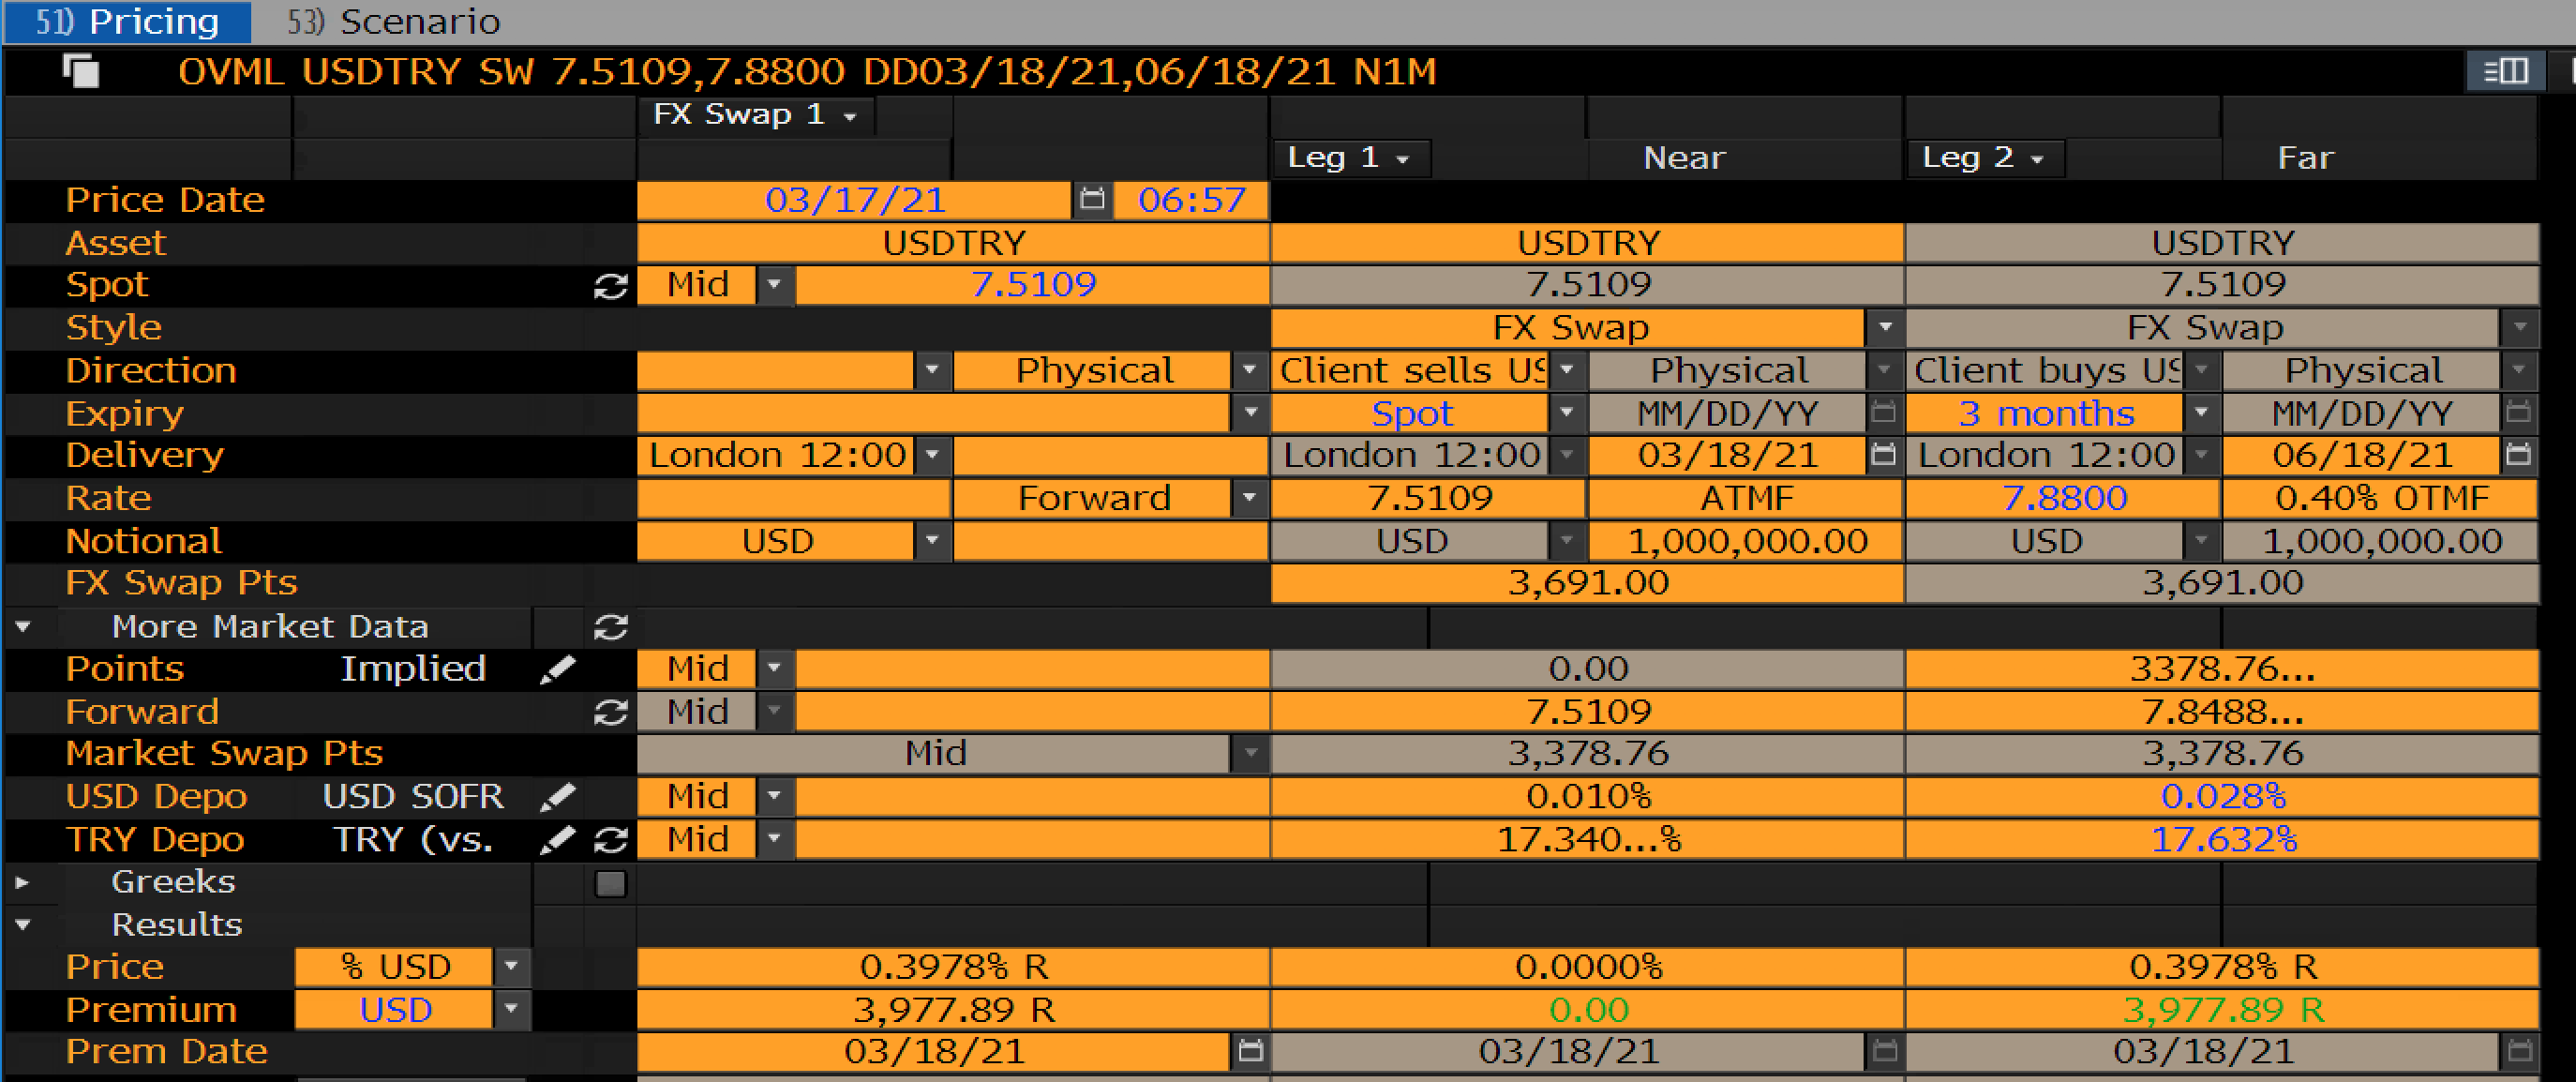